<div style='text-align: center;'>
<a href='https://colab.research.google.com/github/linear-regret/Probabilidad-_II/blob/main/Notebooks_Proba_II/1.Introduccion_Python/2_Probabilidad_python.ipynb' target='_parent'><img src='https://colab.research.google.com/assets/colab-badge.svg' alt='Abrir en google Colab'/></a>
</div>


<!-- Los # nos especifican el nivel de encabezado que queremos, siendo uno sólo el más grande -->
# ¿Cómo se genera un número aleatorio?

¿Si quisieramos crear una máquina tal que al apretar un botón nos arrojara un número al azar del 0 al 1 cómo lo haríamos?
- Maneras [pseudoaleatorias](https://en.wikipedia.org/wiki/Linear_congruential_generator) (son deterministas en una escala que nunca observaremos) de generar números aleatorios entre el 0 y el 1 de manera uniforme.
    - Para generarlas en python podríamos escribir un código que involucre algo como la siguiente fórmula

$$ X_{n+1}=(aX_n+c)\text{mod } m $$


Sin embargo, programar la forma de arriba una y otra vez o tener una implementación por cada persona es ineficiente

- El algoritmo previo, y otros más poderosos, han sido ya implementados por personas expertas en estos temas. 
    - Estas implementaciones se encuentran en algo conocido como librerías.

# Librerías


- Código ya hecho para resolver realizar operaciones frecuentes y resolver problemas comunes.

- Para realizar simulaciones sencillas usaremos la librería de [numpy](https://numpy.org/doc/stable/index.html)
<!-- Para insertar un hipervínculo en un notebook se pone la palabra entre corchetes seguida del hypervínculo en paréntesis -->

<div style='text-align: center;'>
<img src='./img/numpy_logo.png' width='500'/>
</div>

- Para acceder al código de `numpy` hay que usar una de las siguientes formas

In [19]:
# import numpy # importa todas las funciones
import numpy as np  # La forma más usual con un alias
# from numpy import random as rd # importando sólo un módulo en especial con un alias, usado para librerías muy grandes

Con el módulo `random` se pueden generar una variable aleatoria uniforme entre el 0 y el 1 con la siguiente instrucción


In [20]:
# accedemos a código de estas librerías llamandolás por su alias. Los módulos están separados por puntos
np.random.random()

0.3028119714252512

<div style='text-align: center;'>
<img src="./img/numpy.png" alt="drawing" />
</div>

Las librerías pueden tener muchos módulos y los módulos a su vez pueden tener muchas funciones. 

Las funciones de cada librería se pueden llamar con parámetros por defecto (default) o asignar valores a ciertos parámetros, como veremos con la función  

<!-- Tres backicks seguidos les permite poner un bloque de código. Si ponen el lenguaje del código también lo colorea sintácticamente :) -->
```py
np.random.random(size=1000)
```
Para esta función, el valor por defecto de `size` es 1, de modo que si no específicamos otra cosa, generará sólo una variable aleatoria

También dentro del módulo random podemos generar variables aleatorias de la mayoría de las distribuciones conocidas. e.g. la distribución normal. Cuyos valores por defecto son $\mu=0, \sigma=1$

In [21]:
np.random.normal() # Esto es lo mismo a np.random.normal(loc=0,scale=1)

-0.9467392912451225

# Generando muchos números al azar

Podemos hacer una lista de números aleatorios como se ve a continuación


In [22]:
lista_random = []  # Creamos lista vacía

for i in range(10):  # Función range (va de 0 a 9)
    lista_random.append(np.random.random())  # Función append es una función de las listas que sirve para agregar el argumento al final de la misma

lista_random  # Los notebooks "imprimen" la última de las expresiones (no es necesario poner print)

[0.7313789489972103,
 0.36539486419708944,
 0.10194749529604541,
 0.567339008241656,
 0.9277213600473163,
 0.12220057000936269,
 0.05746281850027979,
 0.7146706294549272,
 0.7225051028465175,
 0.4899191409482845]

También existen tipos de datos nativos de cada librería que están programadas para optimizar ciertos cálculos.

En `numpy` se llaman `arrays` y están construidos para comportarse como vectores, matrices, etc. 


In [23]:
# Pasamos un argumento a la función random diciéndole que queremos un arreglo de tamaño 10.

arreglo_random = np.random.random(size=10)
print(f'El tipo de los array es {type(arreglo_random)}')
arreglo_random 

El tipo de los array es <class 'numpy.ndarray'>


array([0.17046792, 0.10584939, 0.66125216, 0.72657318, 0.04713182,
       0.7542922 , 0.31334152, 0.04246826, 0.6744616 , 0.27888853])

## Eficiencia de uso en operaciones de vectores de numpy

Haciendo una operación como el producto punto se obtiene una eficiencia mucho mayor usando `numpy`

<!-- Se pueden poner backticks, los siguientes símbolos `` para que el código del Notebook los interprete como código -->


In [24]:
def producto_punto(lista_1, lista_2):
    suma = 0
    for i in range(len(lista_1)):
        suma = suma + lista_1[i] * lista_2[i] # 1+4+9
    return suma


producto_punto([1, 2, 3], [1, 2, 3])

14

Para comparar el tiempo de ejecución del producto punto entre producto punto como listas y arreglos podemos usar comandos mágicos de jupyter

- Comienzan con `%` o `%%` y sirven para realizar tareas afuera de la celda
- [Lista de comandos mágicos](https://scipy-ipython.readthedocs.io/en/latest/interactive/magics.html)

Primero creamos las listas y los arreglos que usaremos para comparar los tiempos de ejecución. Calcularemos con listas y con arreglos de `numpy` el producto punto de los siguientes vectores

$$ 
\begin{align}
\vec{x}&=(1,2,3,\cdots,1000000)\\
\vec{y}&=(1,1,1,\cdots,1)\\
\end{align}
$$



In [25]:
# Creamos listas para realizar el producto punto
lista_1 = []
lista_2 = []

for i in range(1_000_000):  # Se pueden separar los enteros en python por _ para facilitar su visualización
    lista_1.append(i)
    lista_2.append(1)

array_1, array_2 = np.array(lista_1), np.array(lista_2)

Ahora hacemos uso del comando mágico `%%timeit`. Este comando se escribe al inicio de cada celda y hace un promedio con desviación estándar del tiempo para ejecutar cada celda

In [26]:
%%timeit

producto_punto(lista_1,lista_2)

97.7 ms ± 5.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Ahora usaremos `numpy` para realizar el mismo cálculo. Ciertas librerías permiten escribir operaciones de manera compacta y concisa para facilitar la lectura y escritura del programa. 

En este caso el producto matricial (que en nuestro caso en producto punto por ser matrices de ($1\times N$)) para arrays de `numpy` se escribe con una arroba.

In [27]:
%%timeit

array_1@array_2 # Los arreglos pueden multiplicarse entrada a entrada con el operador @

1.54 ms ± 78.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Vemos que la diferencia en tiempo de ejecución es muy grande (dos órdenes de magnitud). Además que la notación puede resultar más sencilla, sobre todo si se llegan a usar varias operaciones


# Comprobando uniformidad

Dado que tenemos una manera de generar números aleatorios i.e. `np.random.random` 
**¿Cómo sabemos qué una secuencia de números viene de una distribución uniforme?**

- Nunca podremos estar seguros totalmente, pero podemos hacer pruebas estadísticas (goodness of fit).
- A falta de ellas podemos visualizar para tener una mejor idea de qué está ocurriendo.
    - Para ello usaremos otra librería de las más comúnes en python conocida como matplotlib


# Matplotlib

<div style='text-align: center;'>
<img src='./img/matplotlib_logo.png' width=''/>
</div>

De acuerdo a la página tenemos el siguiente pitch de lo que es la librería:

*Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.*
- *Create publication quality plots.*
- *Make interactive figures that can zoom, pan, update.*
- *Customize visual style and layout.*
- *Export to many file formats.*
- *Embed in JupyterLab and Graphical User Interfaces.*
- *Use a rich array of third-party packages built on Matplotlib.*

Si quieren profundizar un poco más en el tema [este video](https://www.youtube.com/watch?v=3Xc3CA655Y4) introductorio es bueno. Aunque para el curso sólo se les va a pedir lo básico.

Al igual que con `numpy` comenzamos importando la librería


In [28]:
# Esto solo dice importa de la librería matplotlib el módulo pyplot (separado por el punto) con el alias plt. Esto significa que usaremos plt para acceder al código de pyplot
import matplotlib.pyplot as plt

A continuación veremos un ejemplo sencillo de graficar puntos en la recta identidad entre el 0 y el 1 separados por 0.1. 

Primero obtenemos los puntos necesarios para la gráfica usando la siguiente función de `numpy` 

In [29]:
x=np.arange(start=0,stop=1,step=0.1)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

Ahora graficamos usando la función `scatter` de la librería `plt` que toma como parámetros las coordenadas x y y que deseamos graficar. 

Después de esto usamos la instrucción `plt.show()` para mostrar la  gráfica. Este paso no es necesario si es la última expresión de la celda porque en cualquier celda siempre se regresa la última expresión

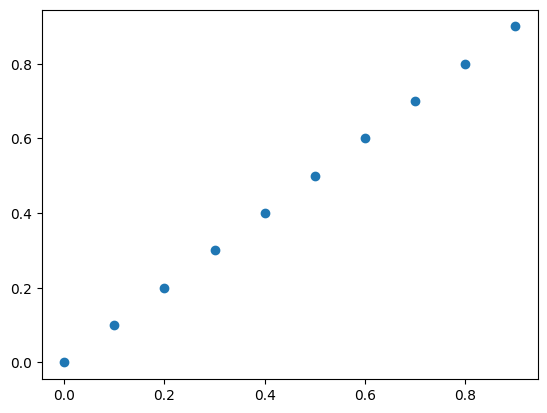

In [30]:
plt.scatter(x,x)
plt.show()

Se puede mejorar el estilo del gráfico con las siguientes instrucciones

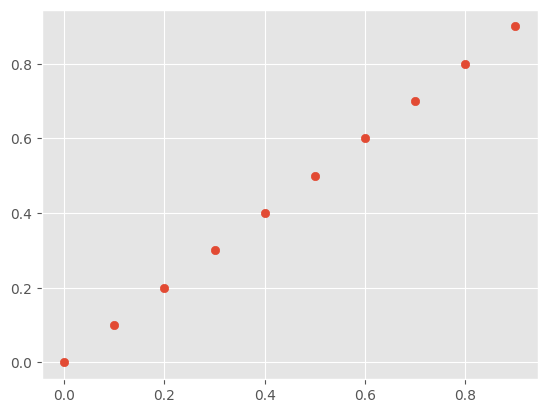

In [31]:
plt.style.use('ggplot') 
plt.scatter(x,x)

Pueden ver una lista de los estilos disponibles en esta [página](https://python-charts.com/matplotlib/styles/).

Una vez llamada la función `plt.style.use` permanecerá el estilo durante todo el resto del cuaderno a menos que la vuelvan a llamar con otro estilo distinto

*Recordamos que `plt.style.use` quiere decir que dentro de la librería con alias `plt` y el móudlo `style` de dicha librería se encuentra la función `use`)*

De las personalizaciones básicas y requeridas para todas las gráficas que entreguen estará el etiquetar los ejes y ponerle un título a la gráfica esto lo podemos obtener de la siguiente forma

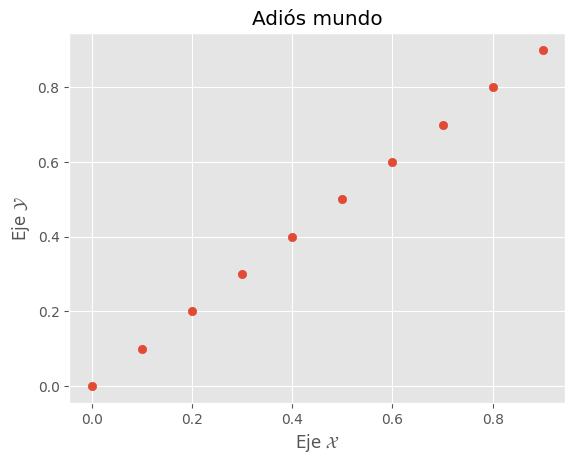

In [32]:
plt.scatter(x,x)
plt.xlabel('Eje $\\mathcal{X}$') # Pueden usar Latex siempre y cuando lo pongan entre signos de pesos $$ y pongan doble backslash donde normalmente iría 1
plt.ylabel('Eje $\\mathcal{Y}$')
plt.title('Adiós mundo')
plt.show()

## Visualización de uniformidad

Ya habiendo visto una introducción a `matplotlib` procedemos a usar otra función que nos ayudará a visualizar la distribución de las variables aleatorias uniformes. Esta es la función `plt.hist` que como su nombre lo indica nos graficará un histograma. 

Un **histograma** tiene en el eje $x$ el valor de la variable aleatoria y en el eje $y$ un conteo de cuántas variables aleatorias aparecieron en alguna cubeta de $x$. Esta cubeta se puede cambiar de tamaño y la elección de tal tamaño es un problema conocido como *binning*.

En este caso la función sólo toma un argumento obligatorio (las realizaciones de la variable aleatoria).



A continuación generaremos varios histogramas en los que se irán simulando cada vez más variables aleatorias

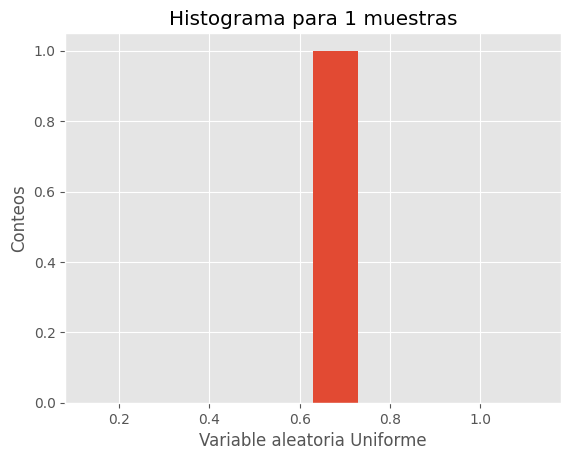

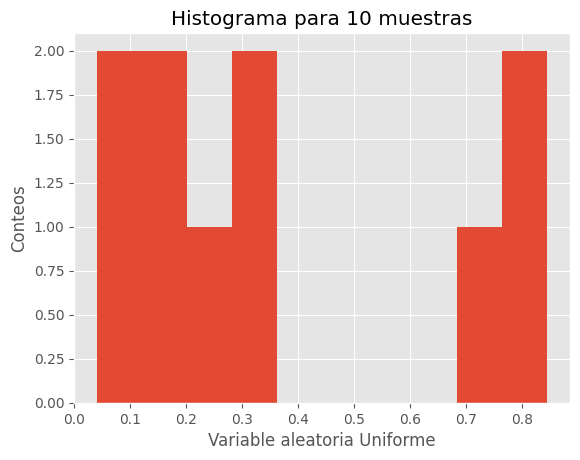

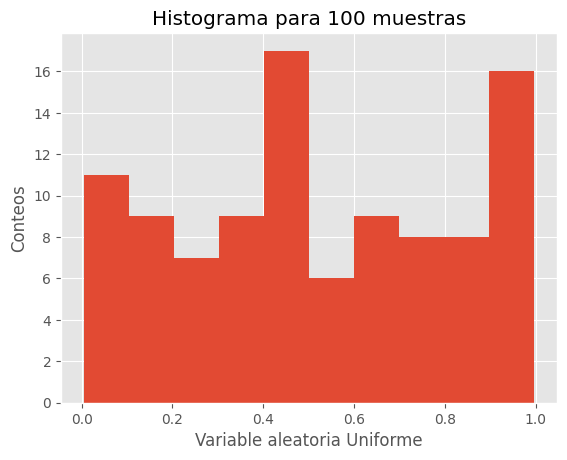

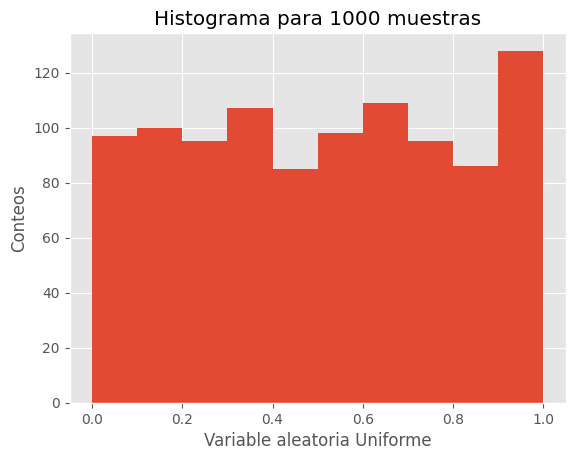

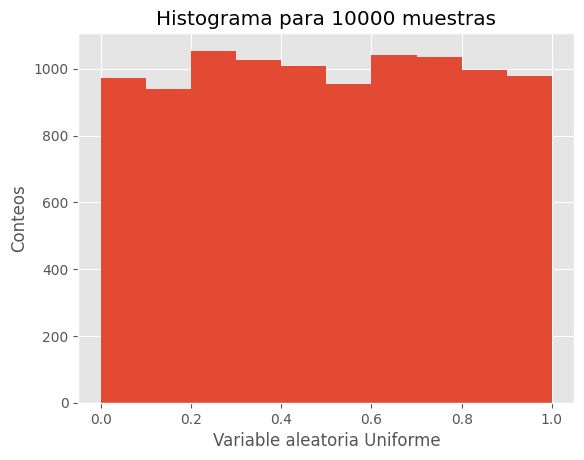

In [33]:
for i in range(0, 5):
    plt.title(f"Histograma para {10**i} muestras") # Cambiando el título dinámicamente cada iteración
    plt.xlabel('Variable aleatoria Uniforme')
    plt.ylabel('Conteos')
    plt.hist(np.random.random(size=10**i))  
    # plt.hist(np.random.random(size=10**i))  
    plt.show()